# Lista 003 - Machine Learning Concepts

Responda cada questão somente dentro do bloco de código descriminado por <b>```### SEU CÓDIGO AQUI ###```</b> e não altere NADA no resto do código. Ao final de cada questão existe uma função para avaliar se a questão está correta, não altere essa função e obedeça o nome das variáveis descrito exercício.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

0. Baixe os microdados do enem do endereço abaixo, extraia e utilize somente os arquivos 'Dicionario_Microdados_Enem_2019' e 'MICRODADOS_ENEM_2019.csv'.

> link para download: http://download.inep.gov.br/microdados/microdados_enem_2019.zip

1. Abra dos microdados do enem e trate os dados da forma descrita abaixo e guarde o resultado na variável 'df':

> 1.1 Selecione somente as colunas ['SG_UF_RESIDENCIA','NU_INSCRICAO','NU_IDADE','TP_COR_RACA','TP_SEXO','NU_NOTA_CN','TP_ESCOLA','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'].

> 1.2 Verifique o dicionário de dados e filtre o dataset somente com os alunos presentes nas provas de Ciência da Natureza, Ciências Humanas, Linguagens e Códigos e Matemática.

> 1.3 Verifique o dicionário de dados e filtre o dataset somente com os alunos de escolas privadas e públicas.

> 1.4 Calcule uma coluna chamada 'nota_final' que representa a média das notas daquele aluno.

> 1.5 Execute um drop nas colunas ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

> 1.6 Execute um drop nos valores nulos da coluna 'nota_final'.

2. Defina as variáveis 'X' e 'y' para um trabalho de regressão que prediga a nota do aluno de acordo com as características em 'X' (dica: não considere colunas com alta cardinalidade).

3. Defina as variáveis 'X_train','X_test', 'y_train', 'y_test', separe para teste somente 25% do total do dataset, o valor da seed aleatória deve ser 42.

4. Adicione as variáveis corretas para o treinamento do modelo instanciado na variável 'model'.

5. Utilize o modelo instanciado em 'model' para gerar predições, guarde-as em 'y_pred'.

6. Adicione as variáveis corretas para a avaliação das métricas.

7. Crie um código que simule 500 valores de X onde todas as variáveis devam ser zeradas, porém a cada iteração a variável idade deve ser incrementada em 1. Use cada um desses valores de X para prever um Y. Plote um gráfico demonstrando o comportamento de Y frente a alteração de X e o interprete (se necessário adicione uma célula markdown para sua interpretação).

### Questão 01

In [2]:
### SEU CÓDIGO AQUI ###

df = pd.read_csv('../data/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',
                 encoding='latin-1',
                 sep=';',
                 usecols=['NU_INSCRICAO','SG_UF_RESIDENCIA','TP_ESCOLA','NU_IDADE','TP_COR_RACA','TP_SEXO','NU_NOTA_CN',
                          'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO',
                          'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'])

df = df[(df.TP_ESCOLA == 2)|(df.TP_ESCOLA == 3)]
df = df[(df.TP_PRESENCA_CN == 1) & (df.TP_PRESENCA_CH == 1) & (df.TP_PRESENCA_LC == 1) & (df.TP_PRESENCA_MT == 1)]
df['nota_final'] = (df.NU_NOTA_CN + df.NU_NOTA_CH + df.NU_NOTA_LC + df.NU_NOTA_MT + df.NU_NOTA_REDACAO) / 5
df.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH',
         'TP_PRESENCA_LC','TP_PRESENCA_MT',
         'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
         'NU_NOTA_MT','NU_NOTA_REDACAO'],axis=1,inplace=True)
df.dropna(subset=['nota_final'],inplace=True)

### SEU CÓDIGO AQUI ###
print(df.shape)
assert df.shape == (1217154, 7),'Não passou no primeiro teste.'
print('Passou no primeiro teste.')
assert 'nota_final' in df.columns,'Não passou no segundo teste.'
print('Passou no segundo teste.')
assert df.isna().sum().sum() == 0,'Não passou no terceiro teste.'
print('Passou no terceiro teste.')
assert round(df.nota_final.mean(),2) == 521.38,'Não passou no quarto teste.'
print('Passou no quarto teste.')
assert round(df.nota_final.var(),2) == 7369.32,'Não passou no quinto teste.'
print('Passou no quinto teste.')
print('Passou em todos os testes.\nOs dados já estão prontos para serem utilizados nas próximas questões.')

(1217154, 7)
Passou no primeiro teste.
Passou no segundo teste.
Passou no terceiro teste.
Passou no quarto teste.
Passou no quinto teste.
Passou em todos os testes.
Os dados já estão prontos para serem utilizados nas próximas questões.


### Questão 02

In [3]:
df['SG_UF_RESIDENCIA'] = pd.factorize(df.SG_UF_RESIDENCIA)[0]
df['TP_SEXO'] = pd.factorize(df.TP_SEXO)[0]

### SEU CÓDIGO AQUI ###

y = df.nota_final
X = df[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA']]

### SEU CÓDIGO AQUI ###

assert X.shape == (1217154, 5),'Não passou no primeiro teste.'
print('Passou no primeiro teste.')
assert 'nota_final' not in X.columns,'Não passou no segundo teste.'
print('Passou no segundo teste.')
assert y.shape == (1217154,),'Não passou no terceiro teste.'
print('Passou no terceiro teste.')
assert y.name == 'nota_final','Não passou no quarto teste.'
print('Passou no quarto teste.')
print('Passou em todos os testes.\nContinue para a próxima questão.')

Passou no primeiro teste.
Passou no segundo teste.
Passou no terceiro teste.
Passou no quarto teste.
Passou em todos os testes.
Continue para a próxima questão.


### Questão 3

In [4]:
### SEU CÓDIGO AQUI ###

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


### SEU CÓDIGO AQUI ###

assert X_train.shape == (912865, 5), 'Não passou no primeiro teste.'
print('Passou no primeiro teste.')
assert X_test.shape == (304289, 5), 'Não passou no segundo teste.'
print('Passou no segundo teste.')
assert y_train.shape == (912865,), 'Não passou no terceiro teste.'
print('Passou no teceiro teste.')
assert y_test.shape == (304289,), 'Não passou no quarto teste.'
print('Passou no quarto teste.')
assert round(y_test[145421],2) == 367.28, 'Não passou no quinto teste.'
print('Passou no quinto teste.')
assert X_test.loc[145421,'NU_IDADE'] == 19, 'Não passou no sexto teste.'
print('Passou no quarto teste.')
print('Passou em todos os testes.\nContinue para a próxima questão.')

Passou no primeiro teste.
Passou no segundo teste.
Passou no teceiro teste.
Passou no quarto teste.
Passou no quinto teste.
Passou no quarto teste.
Passou em todos os testes.
Continue para a próxima questão.


### Questão 4

In [5]:
model = LinearRegression()

### SEU CÓDIGO AQUI ###

model = LinearRegression()
model.fit(X_train, y_train)


### SEU CÓDIGO AQUI ###

assert round(model.__getstate__()['singular_'][0],2) == 6743.96, 'Não passou no primeiro teste. Certifique-se de usar o subset correto.'
print('Passou em todos os testes.\nContinue para a próxima questão.')

Passou em todos os testes.
Continue para a próxima questão.


### Questão 5

In [6]:
### SEU CÓDIGO AQUI ###

y_pred = model.predict(X_test)

### SEU CÓDIGO AQUI ###

try:
    check_is_fitted(model)
except:
    print('O modelo não foi treinado. Refaça a questão anterior')

assert round(y_pred[100],2) == 493.68, 'Não passou no primeiro teste.'
print('Passou no primeiro teste.')
assert round(y_pred.mean(),2) == 521.23, 'Não passou no segundo teste.'
print('Passou no segundo teste.')
print('Passou em todos os testes.\nContinue para a próxima questão.')

Passou no primeiro teste.
Passou no segundo teste.
Passou em todos os testes.
Continue para a próxima questão.


### Questão 6

In [7]:
### SEU CÓDIGO AQUI ###

mae = mean_absolute_error(y_test, model.predict(X_test)) # y_pred
mse = mean_squared_error(y_test, model.predict(X_test)) #y_pred)

### SEU CÓDIGO AQUI ###

assert round(mae,2) == 59.7,'Não passou no primeiro teste.'
print('Passou no primeiro teste.')
assert round(mse,2) == 5623.15,'Não passou no segundo teste.'
print('Passou no segundo teste.')
print('Passou em todos os testes.\nContinue para a próxima questão.')

Passou no primeiro teste.
Passou no segundo teste.
Passou em todos os testes.
Continue para a próxima questão.


### Questão 7

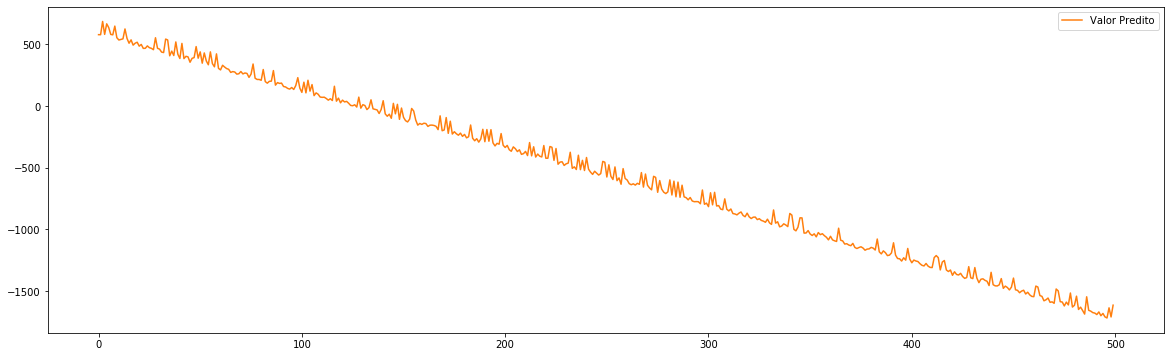

In [8]:
### SEU CÓDIGO AQUI ###

X_test = X_test.reset_index(drop=True)
df_test = X_test.loc[range(500)]

dados = pd.DataFrame(columns=['PREDITO','IDADE'])

for i in range(500):
    df_test.at[i, 'NU_IDADE'] = i
    dados['IDADE'] = i
    dados['PREDITO'] = model.predict(df_test)

plt.figure(figsize=(20,6))
plt.plot(dados['PREDITO'],color='tab:orange',label='Valor Predito')
plt.legend()
plt.show()

### SEU CÓDIGO AQUI ###


